In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_excel('clean_data.xlsx', index_col='id_case')
pd.options.display.float_format = '{:.0f}'.format

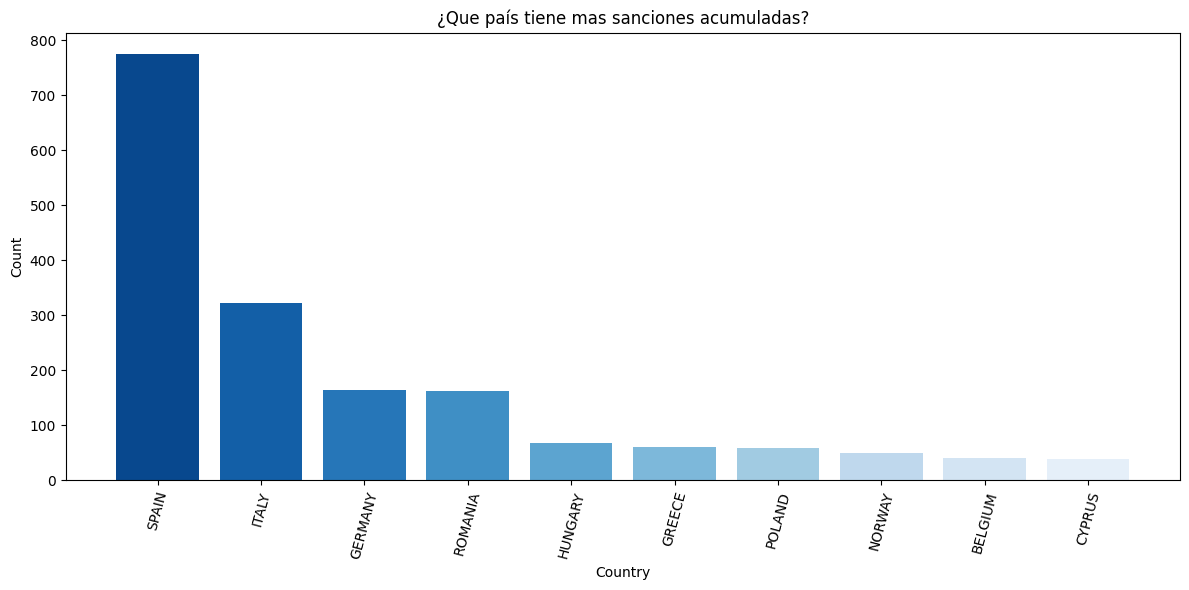

In [88]:
# Sort the DataFrame by count in descending order for a better-looking histogram
df_aux = df['country'].value_counts().head(10)


colors = sns.color_palette("Blues", len(df_aux))[::-1]

plt.figure(figsize=(12, 6))
plt.bar(df_aux.index, df_aux, color=colors)  # Use df_aux.index and df_aux values for plotting
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('¿Que país tiene mas sanciones acumuladas?')
plt.xticks(rotation=75)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()



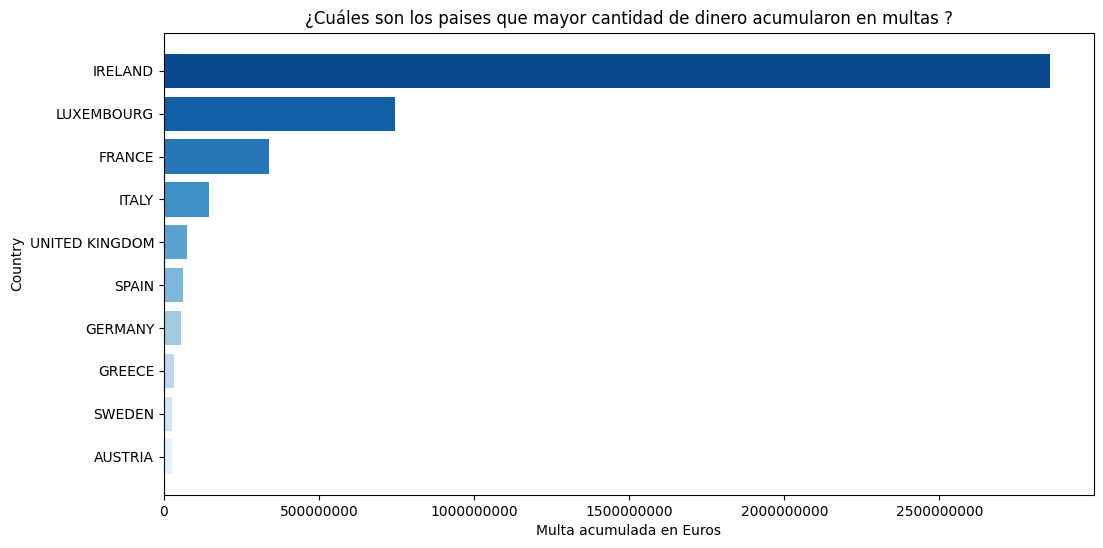

In [128]:
#cuales son los paises que tienen la mayor cantidad acumulada de multas?
df_aux = df.groupby("country")["penalty_fee"].sum().reset_index().sort_values(by = "penalty_fee").tail(10)

colors = sns.color_palette("Blues", len(df_aux))

plt.figure(figsize=(12, 6))
plt.barh(df_aux.country, df_aux.penalty_fee, color=colors)  # Usa plt.barh para un gráfico de barras horizontal

plt.ticklabel_format(style='plain', axis='x') 
plt.xlabel('Multa acumulada en Euros')  # Invierte los títulos de los ejes x y y
plt.ylabel('Country')
plt.title('¿Cuáles son los paises que mayor cantidad de dinero acumularon en multas ?')
plt.show() # Rotate x-axis labels for readability

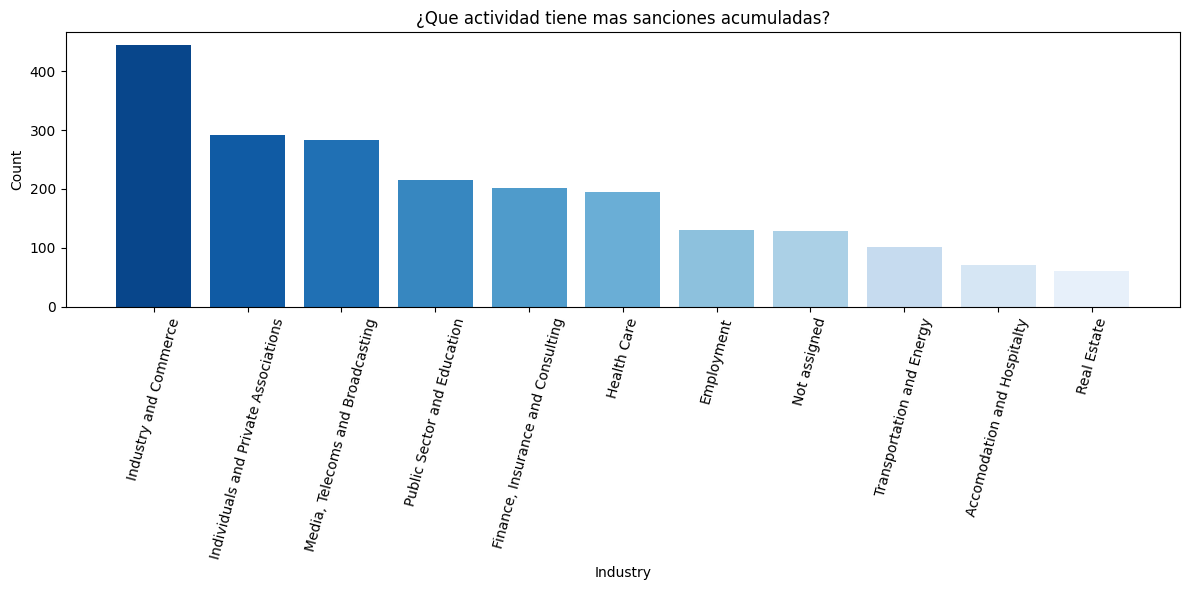

In [129]:
#que industria es la mas afectada por el GDPR
df_aux = df['subjet_industry'].value_counts()

colors = sns.color_palette("Blues", len(df_aux))[::-1]

plt.figure(figsize=(12, 6))
plt.bar(df_aux.index, df_aux, color=colors)  # Use df_aux.index and df_aux values for plotting
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('¿Que actividad tiene mas sanciones acumuladas?')
plt.xticks(rotation=75)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

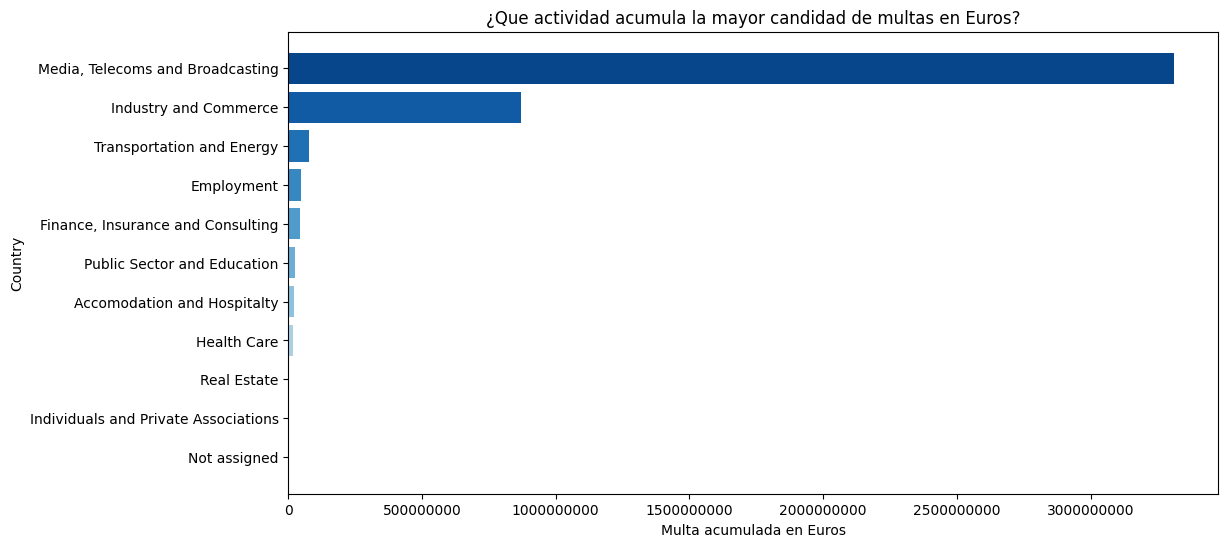

In [130]:
#cuales son las industrias que tienen la mayor cantidad acumulada de multas?
df_aux = df.groupby("subjet_industry")["penalty_fee"].sum().reset_index().sort_values(by = "penalty_fee")

colors = sns.color_palette("Blues", len(df_aux))

plt.figure(figsize=(12, 6))
plt.barh(df_aux.subjet_industry, df_aux.penalty_fee, color=colors)  

plt.ticklabel_format(style='plain', axis='x') 
plt.xlabel('Multa acumulada en Euros')  
plt.ylabel('Country')
plt.title('¿Que actividad acumula la mayor candidad de multas en Euros?')
plt.show() # Rotate x-axis labels for readability

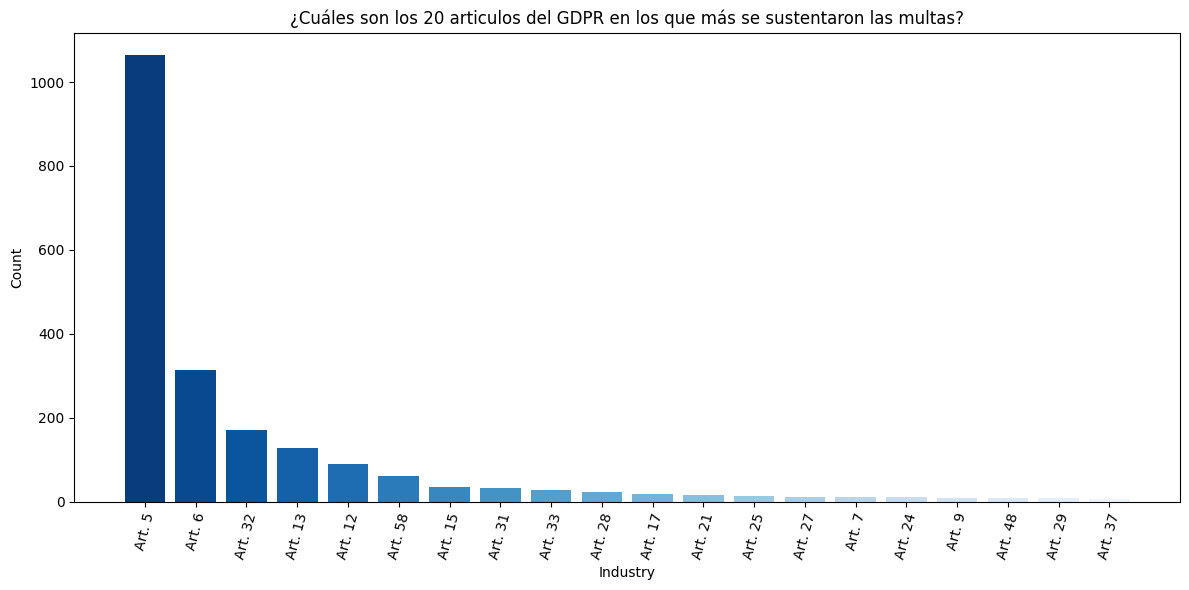

In [121]:
#cuales son los articulos 20 que mas se infringieron?

df['law'] = df['law'].str.replace(r'Art\.\s*\\d+\s*\([^)]+\)', r'Art. \\d+', regex=True)
article_numbers = df['law'].str.extract(r'(Art\.\s*\d+)')
df_aux = article_numbers[0].value_counts().head(20)

colors = sns.color_palette("Blues", len(df_aux))[::-1]

plt.figure(figsize=(12, 6))
plt.bar(df_aux.index, df_aux, color=colors)  # Use df_aux.index and df_aux values for plotting
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('¿Cuáles son los 20 articulos del GDPR en los que más se sustentaron las multas?')
plt.xticks(rotation=75)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

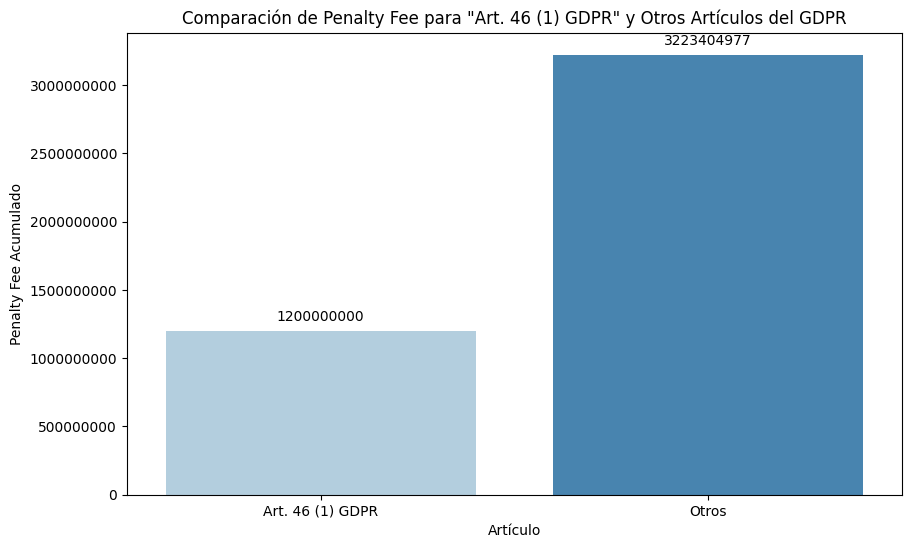

In [120]:
# Drop the existing index column
df_aux = df_aux.drop(columns=['index'], errors='ignore')

# Reset the index to default integer index
df_aux = df_aux.reset_index()

# Handle non-numeric values in 'penalty_fee' column
df_aux['penalty_fee'] = pd.to_numeric(df_aux['penalty_fee'], errors='coerce')

# Create a new column for grouping "Art. 46 (1) GDPR" and other values
df_aux['grouped_law'] = 'Otros'
df_aux.loc[df_aux['law'] == 'Art. 46 (1) GDPR', 'grouped_law'] = 'Art. 46 (1) GDPR'

# Group by the new column and sum
df_grouped = df_aux.groupby('grouped_law')['penalty_fee'].sum()

# Create the cumulative bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_grouped.index, y=df_grouped, hue=df_grouped.index, palette="Blues")

# Add count annotations on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Format y-axis ticks as plain numbers
plt.ticklabel_format(style='plain', axis='y') 

# Labels and title
plt.xlabel('Artículo')
plt.ylabel('Penalty Fee Acumulado')
plt.title('Comparación de Penalty Fee para "Art. 46 (1) GDPR" y Otros Artículos del GDPR')
plt.show()

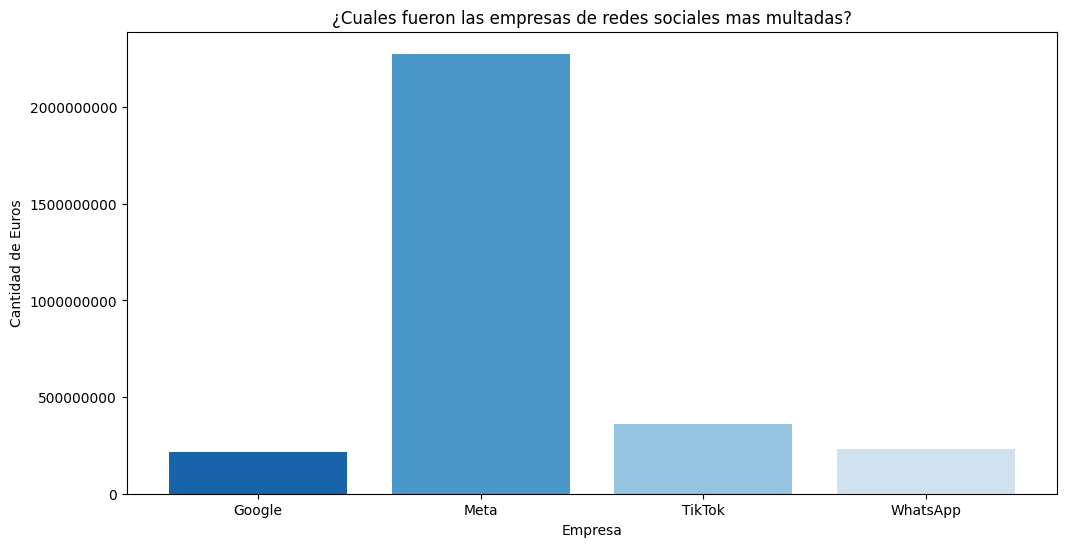

In [122]:
#Que tan presentes estan las multas en empresas de redes sociales?
df_aux = df.query('subjet.str.contains("Meta|TikTok|Google|WhatsApp", case=False, na=False)', engine='python').copy()
reemplazos = {
    r'.*Google.*': 'Google',
    r'.*Meta.*': 'Meta',
    r'.*WhatsApp.*': 'WhatsApp',
    r'.*TikTok.*': 'TikTok'
}

df_aux['subjet'] = df_aux['subjet'].replace(reemplazos, regex=True)
df_aux = df_aux.groupby('subjet')['penalty_fee'].sum().reset_index().tail(4)
colors = sns.color_palette("Blues", len(df_aux))[::-1]

plt.figure(figsize=(12, 6))
plt.bar(df_aux.subjet, df_aux.penalty_fee, color=colors)  # Usa plt.barh para un gráfico de barras horizontal
plt.ticklabel_format(style='plain', axis='y') 
plt.xlabel('Empresa')  # Invierte los títulos de los ejes x y y
plt.ylabel('Cantidad de Euros')
plt.title('¿Cuales fueron las empresas de redes sociales mas multadas?')
plt.show()

In [125]:
#Tiene multas LinkedIn?
df.query('subjet.str.contains("Microsoft|LinkedIn", case=False, na=False)', engine='python')

,country,authority,date,penalty_fee,subjet,subjet_industry,law,summary_law,summary_case,court_file
id_case,,,,,,,,,,
